Dataset nr records=10000 nr variables=16


<Figure size 640x480 with 0 Axes>

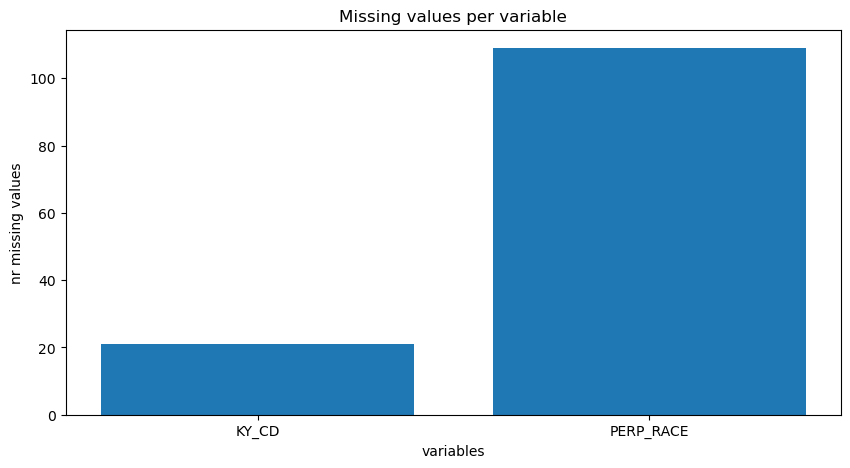

In [6]:
from pandas import read_csv, DataFrame
from matplotlib.pyplot import figure, show, bar


def plot_bar_chart(x, y, title="", xlabel="", ylabel=""):
    figure(figsize=(10, 5))
    bar(x, y)
    set_chart_labels(title, xlabel, ylabel)
    show()


def set_chart_labels(title, xlabel, ylabel):
    from matplotlib.pyplot import title as plt_title, xlabel as plt_xlabel, ylabel as plt_ylabel
    plt_title(title)
    plt_xlabel(xlabel)
    plt_ylabel(ylabel)



data: DataFrame = read_csv("/Users/tomifemme/Desktop/DataScience/Projeto/Preparation/Missing Values/ny_arrests_enoded.csv")
print(f"Dataset nr records={data.shape[0]}", f"nr variables={data.shape[1]}")

mv: dict[str, int] = {}
figure()
for var in data:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
show()

In [7]:

total_values = data.shape[0]
print(f"Total values per variable: {total_values}")
print("Comparison between missing values and total values:")
for variable, missing_count in mv.items():
    print(f"Variable: {variable}, Missing Values: {missing_count}")

Total values per variable: 10000
Comparison between missing values and total values:
Variable: KY_CD, Missing Values: 21
Variable: PERP_RACE, Missing Values: 109


In [8]:
data_cleaned = data.dropna()
print(f"Dataset after dropping missing values: {data_cleaned.shape[0]} records")

Dataset after dropping missing values: 9870 records


In [9]:
data_filled = data.fillna(data.mean())
print(data_filled.shape)

(10000, 16)


In [10]:
data_cleaned.to_csv('data_cleaned.csv', index=False)
data_filled.to_csv('data_filled.csv', index=False)